##Вариант 3


1. Решить задачу линейного программирования на минимум и на
максимум при помощи библиотек pulp, scipy.Optimize, cvxopt
(Пример см. Приожение 1)
2. Построить решение в графическом виде, указав оптимальные
точки
3. Сверить ответ с приведенным ответом (как правило, приведен
один вариант ответа), сверить ответы между собой — вывести
таблицу в виде: метод — ответ — время

Среди чисел x и y, удовлетворяющих условиям

**Система:**
$$y≥0$$
$$x+ y ≤1$$
$$x−4 y≥−2$$

найти такие, при которых разность этих чисел y-x принимает наибольшее
значение.

Ответ: **x =-2; y=0**



##Установим все нужные библиотеки для работы(*pulp,scipy.Optimize,cvxopt*)

In [4]:
!pip install pulp scipy cvxopt

##Библиотека pulp

In [34]:
import pulp
import time

start = time.time()

model = pulp.LpProblem("LP_max", pulp.LpMaximize)

x = pulp.LpVariable('x')
y = pulp.LpVariable('y', lowBound=0)

model += y - x

model += x + y <= 1
model += x - 4*y >= -2

model.solve(pulp.PULP_CBC_CMD(msg=0))

end = time.time()

print("PuLP:")
print("x =", pulp.value(x))
print("y =", pulp.value(y))
print("Макс. значение y - x =", pulp.value(y - x))
print("Время выполнения =", round(end - start, 6), "сек.")



PuLP:
x = -2.0
y = 0.0
Макс. значение y - x = 2.0
Время выполнения = 0.00806 сек.


##Библиотека scipy

In [13]:
from scipy.optimize import linprog
import time

start = time.time()

c = [1, -1]

A = [
    [1, 1],
    [-1, 4]
]
b = [1, 2]

bounds = [(None, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

end = time.time()

print("SciPy:")
print("x =", res.x[0])
print("y =", res.x[1])
print("Макс. значение y - x =", -res.fun)
print("Время выполнения =", round(end - start, 6), "сек.")


SciPy:
x = -2.0
y = 0.0
Макс. значение y - x = 2.0
Время выполнения = 0.00432 сек.


##Библиотека cvxopt

In [28]:
from cvxopt import matrix, solvers
import time

start = time.time()

c = matrix([1.0, -1.0])

G = matrix([
    [1.0, -1.0, 0.0],
    [1.0,  4.0, -1.0]
])
h = matrix([1.0, 2.0, 0.0])

sol = solvers.lp(c, G, h)

end = time.time()

x_opt, y_opt = sol['x'][0], sol['x'][1]

print("CVXOPT:")
print("x =", x_opt)
print("y =", y_opt)
print("Макс. значение y - x =", y_opt - x_opt)
print("Время выполнения =", round(end - start, 6), "сек.")


     pcost       dcost       gap    pres   dres   k/t
 0: -2.2222e-01 -5.0000e+00  1e+00  0e+00  5e+00  1e+00
 1: -3.0999e-01 -2.0321e+00  5e-01  6e-17  2e+00  4e-01
 2: -1.6781e+00 -4.4279e+00  3e+00  8e-16  3e+00  1e+00
 3: -1.9256e+00 -2.0658e+00  1e-01  6e-16  2e-01  5e-02
 4: -1.9993e+00 -2.0007e+00  1e-03  4e-16  2e-03  6e-04
 5: -2.0000e+00 -2.0000e+00  1e-05  1e-16  2e-05  6e-06
 6: -2.0000e+00 -2.0000e+00  1e-07  7e-16  2e-07  6e-08
 7: -2.0000e+00 -2.0000e+00  1e-09  5e-16  2e-09  6e-10
Optimal solution found.
CVXOPT:
x = -1.999999999252164
y = 1.987946948144185e-12
Макс. значение y - x = 1.999999999254152
Время выполнения = 0.00511 сек.


##Графическое решение

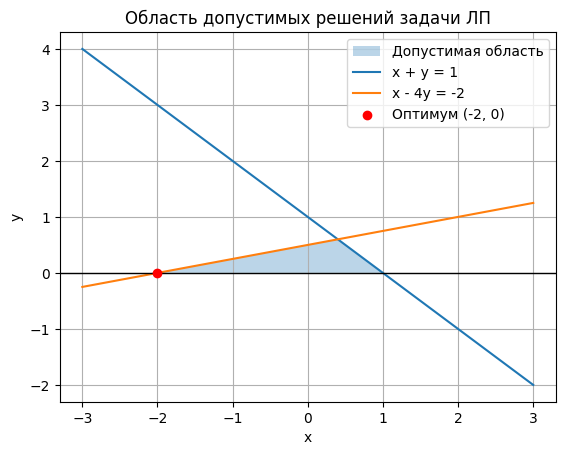

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# диапазон значений x
x_vals = np.linspace(-3, 3, 400)

# линии ограничений
y1 = 1 - x_vals        # x + y = 1
y2 = (x_vals + 2)/4    # x - 4y = -2
y0 = np.zeros_like(x_vals)  # y = 0

# строим допустимую область
plt.fill_between(x_vals, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2) >= 0), alpha=0.3, label="Допустимая область")

# линии ограничений
plt.plot(x_vals, y1, label="x + y = 1")
plt.plot(x_vals, y2, label="x - 4y = -2")
plt.axhline(0, color='black', linewidth=1)

# оптимальная точка
plt.scatter(-2, 0, color='red', zorder=5, label="Оптимум (-2, 0)")

# оформление
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Область допустимых решений задачи ЛП")
plt.grid(True)
plt.show()


## Вывод:
Все три метода дали одинаковое решение:
$$x=-2,y=0,max(y-x)=2$$

*  SciPy показал наилучшее время работы

*  CVXOPT на 2 месте

*  PuLP самый медленный

Результат совпадает с аналитическим ответом и подтверждается графиком